[ 6.13257780e+00  1.97619772e-01 -1.28446861e+02  1.81040303e-03
 -2.43224728e+00] [5.94112379e-01 1.26259289e-03 6.80872394e-01 5.84502356e-03
 3.16948749e+00]


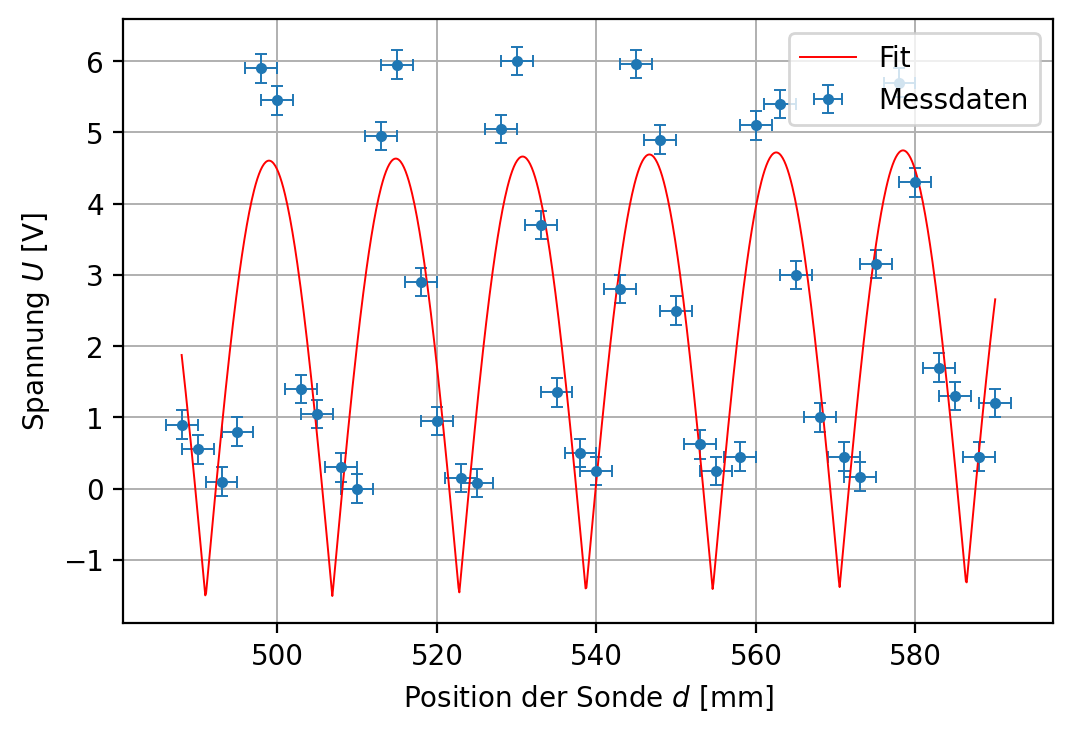

In [2]:
###Messung ohne Lecherleitung



import numpy as np #Numpy enthält viele mathematische Funktionen
import matplotlib.pyplot as plt #enthält die Grundlagen der Darstelllung
import scipy.optimize as opt #liefert Funktionen, mit denen die Funktionsparameter berechnet werden

data = np.loadtxt('messung2.txt')
mid = 20 ##abstand zur Mitte der Sonde

x = data[:,0] - mid #Die Werte der ersten Spalte sind die x-Werte
y = data[:,1] #in der zweiten Spalte sind die y-Werte
sigma = np.zeros(len(data)) + 0.2 #In dritten Spalte stehen die y-Fehler
sig_x = 2 ##Fehler der Position

def f(x, A, b, c, d,e): #Hier wird die Funktion beschrieben deren Verlauf genähert werden soll. Dabei ist wichtig, dass x an erster Stelle steht
	return  np.abs(A*np.sin(b*x+c)) + d*x + e

p0 = [0.1,0.01,0.1,0,0] #In dieser Zeile werden geschätzte Werte für a und b angegeben

x_test = np.linspace(np.min(x),np.max(x),1000)


fit, err = opt.curve_fit(f, x, y, p0, sigma) #Durch diese Zeile werden die Parameter des Fits berechnet. Bei der chi²-Methode wird nur der y-Fehler beachtet.
# dokumentation von curve_fit: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
perr = np.sqrt(np.diag(err)) #hier wird der zu den Parametern gehörige Fehler bestimmt

print(fit,perr)


plt.figure(dpi = 200) #erstellen einer neuen Abbildung

plt.errorbar(x, y, xerr = sig_x,yerr=sigma, marker='.', ls='', capsize=2, capthick=0.7, lw=0.7, label="Messdaten") #Die Messwerte werden mit Fehler dargestellt. 
 
plt.plot(x_test, f(x_test,fit[0],fit[1],fit[2],fit[3],fit[4]), lw = 0.7,label="Fit",color = 'r') #Hiermit wird die Funktion dargestellt) 

#--------------Stil-----------------------
plt.xlabel("Position der Sonde $d$ [mm]") #x-Beschriftung
plt.ylabel("Spannung $U$ [V]") #y-Beschriftung
plt.grid(lw=0.7) #Darstellung eines Rasters im Hintergrund
plt.legend() #Anzeige der Legende 
plt.savefig('aus1_1.png') #Hiermit wird der Plot in der Datei 'Plot.pdf' gespeichert
plt.show() #Vorschau des Plots



[ 0.27597233  0.09530422  2.80146006  0.00602467 -1.61893776] [5.27498721e-02 2.29278317e-03 1.02745463e+00 4.56766069e-04
 2.10645364e-01]


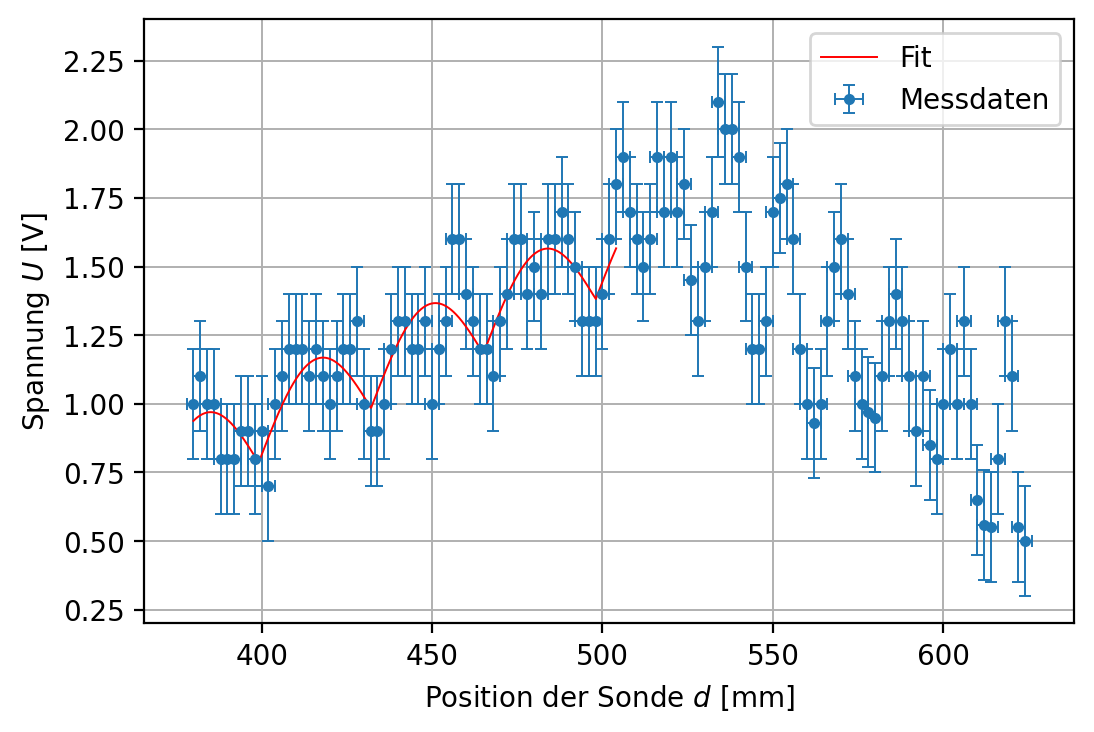

In [3]:
## Messung mit Lecherleitung

###Messung ohne Lecherleitung



import numpy as np #Numpy enthält viele mathematische Funktionen
import matplotlib.pyplot as plt #enthält die Grundlagen der Darstelllung
import scipy.optimize as opt #liefert Funktionen, mit denen die Funktionsparameter berechnet werden

data = np.loadtxt('messung5.txt')
mid = 20 ##abstand zur Mitte der Sonde

x = data[:,0] - mid #Die Werte der ersten Spalte sind die x-Werte
y = data[:,1] #in der zweiten Spalte sind die y-Werte
sigma = np.zeros(len(x)) + 0.2 #In dritten Spalte stehen die y-Fehler
sig_x = 2 ##Fehler der Position

def f(x, A, b, c, d,e): #Hier wird die Funktion beschrieben deren Verlauf genähert werden soll. Dabei ist wichtig, dass x an erster Stelle steht
	return  np.abs(A*np.sin(b*x+c)) + d*x + e

p0 = [0.1,0.1,0.1,0,0] #In dieser Zeile werden geschätzte Werte für a und b angegeben

##nicht alle Werte für fit berücksichtigen
x_fit = x[60:]
y_fit = y[60:]
sigma_fit = np.zeros(len(x_fit)) + 0.2
x_test = np.linspace(np.min(x_fit),np.max(x_fit),1000)


fit, err = opt.curve_fit(f, x_fit, y_fit, p0, sigma_fit) #Durch diese Zeile werden die Parameter des Fits berechnet. Bei der chi²-Methode wird nur der y-Fehler beachtet.
# dokumentation von curve_fit: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
perr = np.sqrt(np.diag(err)) #hier wird der zu den Parametern gehörige Fehler bestimmt


print(fit,perr)
plt.figure(dpi = 200) #erstellen einer neuen Abbildung

plt.errorbar(x, y, xerr = sig_x,yerr=sigma, marker='.', ls='', capsize=2, capthick=0.7, lw=0.7, label="Messdaten") #Die Messwerte werden mit Fehler dargestellt. 
 
plt.plot(x_test, f(x_test,fit[0],fit[1],fit[2],fit[3],fit[4]), lw = 0.7,label="Fit",color = 'r') #Hiermit wird die Funktion dargestellt) 

#--------------Stil-----------------------
plt.xlabel("Position der Sonde $d$ [mm]") #x-Beschriftung
plt.ylabel("Spannung $U$ [V]") #y-Beschriftung
plt.grid(lw=0.7) #Darstellung eines Rasters im Hintergrund
plt.legend() #Anzeige der Legende 
plt.savefig('aus1_2.png') #Hiermit wird der Plot in der Datei 'Plot.pdf' gespeichert
plt.show() #Vorschau des Plots



In [4]:
## Wellenlängen
b = np.array([1980e-4,953e-4])
sigb = np.array([18,23])*1e-4

lam = 2 * np.pi / b
siglam = sigb* 2 * np.pi / b**2

print(lam, siglam)

[31.73325913 65.93059084] [0.28848417 1.5911895 ]
